# <span style="color:darkblue"> Lecture 18: PCA and K-means clustering </span>


<font size = "5">


PCA:

https://www.youtube.com/watch?v=nEvKduLXFvk

K-means clustering:

https://www.youtube.com/watch?v=R2e3Ls9H_fc

# <span style="color:darkblue"> I. Setup Working Environment </span>

Install the faiss-CPU package for fast kmeans clustering

<font size = "5">

``` conda install -c conda-forge faiss-cpu ```

In [25]:
# Import the package for the University of California Irvine API
from ucimlrepo import fetch_ucirepo 

# Import SK-Learn library for machine learning functions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.metrics import get_scorer_names

# Import PCA
from sklearn.decomposition import PCA


# Import standard data analysis packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Kmeans
from sklearn.cluster import MiniBatchKMeans

import faiss


# <span style="color:darkblue"> II. Data </span>

<font size = "5">

Cancer screening dataset


In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


<font size = "5">

Check features

In [27]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# <span style="color:darkblue"> III. Principal Components Analysis </span>


<font size = "5">

A factor is a linear combination of the columns of $X$

$F = X \omega$

We call $\omega \in \mathbb{R}^K$ the factor loadings.

- More factors can describe the data better
- Fewer factors reduce dimensionality, i.e. regularize.
- Principal Components Analysis (PCA) is an algorithm <br>
to obtain factors.


<font size = "5">

Intuition: The first factor solves

$ \quad \omega_1 = \arg\max_{\omega \in \mathbb{R}^K} \frac{\omega^TX^TX\omega}{\omega^T\omega} $

$F_i^{FIRST} = \sum_{k=1}^K \omega_k^{FIST} X_{ik}$

- This tries to compute the most variation in $X$
- The second factor solves a similar problem, with the $X$ residual <br>
not explained by the first factor

In [28]:
# Choose number of components

pca = PCA(n_components=3)
# fit PCA model to beast cancer data
pca.fit(X_train)

PCA(n_components=3)

<font size = "5">

We can check the loadings for each factor

In [29]:
# pca_components_ has the factor loadings
factor_loadings = pd.DataFrame(pca.components_,
                               columns = cancer.feature_names)

factor_loadings

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.004985,0.001995,0.034312,0.514386,0.000004,0.000038,0.000077,0.000046,0.000006,-0.000003,...,0.007043,0.002836,0.048654,0.853525,0.000006,0.000094,0.000152,0.000070,0.000016,0.000001
1,0.008863,-0.003974,0.059971,0.852528,-0.000012,-0.000004,0.000077,0.000046,-0.000020,-0.000014,...,-0.000811,-0.015200,-0.002298,-0.518050,-0.000071,-0.000258,-0.000171,-0.000032,-0.000153,-0.000052
2,-0.012357,-0.005176,-0.072924,-0.047779,0.000068,0.000075,0.000247,0.000019,0.000116,0.000045,...,-0.015658,-0.027245,-0.095353,-0.028912,-0.000038,-0.000714,-0.000724,-0.000336,-0.000338,-0.000034


<font size = "5">

A way to visualize loadings

Text(0, 0.5, 'Principal components')

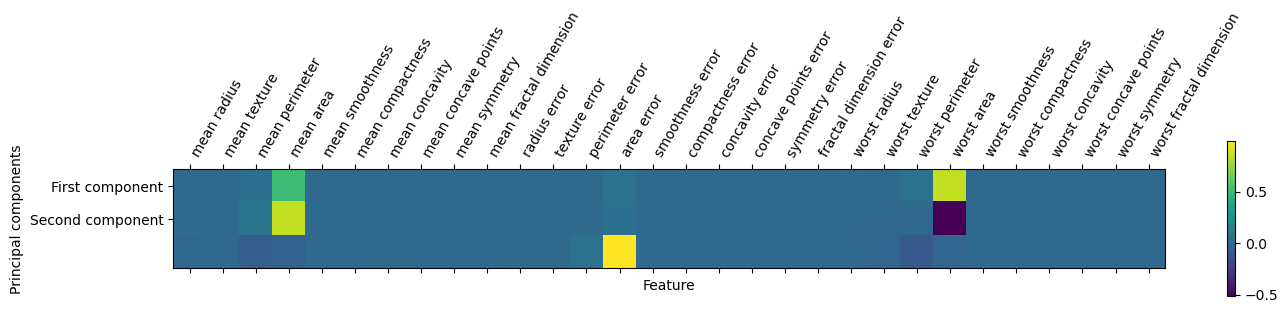

In [30]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,  1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")


<font size = "5">

Compute factors

In [31]:
# transform data onto the first two principal components

X_pca = pca.transform(X_train)


<font size = "5">

Are factors useful for prediction?

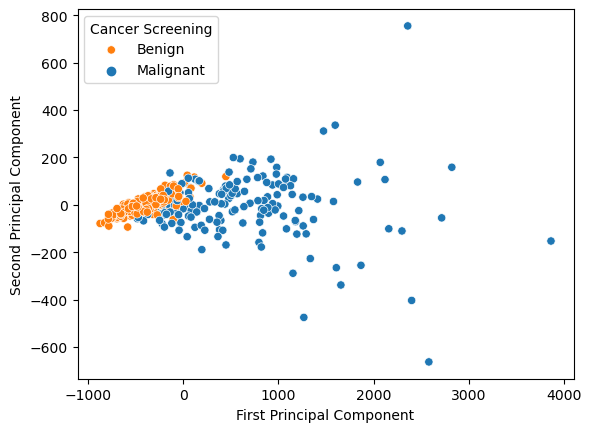

In [32]:
# Hue is used to color

ax = sns.scatterplot(x = X_pca[:,0],
                     y = X_pca[:,1],
                     hue = y_train)
ax.set(xlabel='First Principal Component',
       ylabel='Second Principal Component')
ax.legend(title='Cancer Screening', loc='upper left', labels=
                      ["Benign","Malignant"])


<font size = "5">

Try it yourself

- PCA can be sensitive to the way the data is processed
- Demean and scale the $X$ variables using the techniques we covered <br>
in the previous classes.
- What changes?

Note: The units of each factor can change. <br>
Therefore, it is better not to interpret <br>
PCA factors directly, but just view them as an intermediate <br>
dimensionality reduction step for further analyses

In [33]:
# Write your own code




<font size = "5">

Try it yourself

- This examples look like a good candidate for SVM, since <br>
we can draw a hyperplane to separate the factors.
- Run an SVM and test the classification accuracy

In [34]:
# Write your own code




# <span style="color:darkblue"> IV. K-Means Clustering </span>


<font size = "5">

K-means clsutering is a closely related algorithm for clustering <br>
groups of observations


In [48]:
# ncentroids is the number of cluster
# niter controls how many iterations. "KMeans" is an iterative algorithm,
# the more iterations yuo run, the close you are the optimum
# d is the number of columns
# verbose controls where you get messages with the status of the process

ncentroids = 3
niter = 100
verbose = True
d = X_train.shape[1]

kmeans = faiss.Kmeans(d,
                      ncentroids,
                      niter=niter,
                      verbose=verbose,
                      seed = 0)


<font size = "5">

Train and compute clusters

In [47]:
# Convert to float 
Xtilde = np.float32(X_train)
kmeans.train(Xtilde)

# Assign observations to clusters
results = kmeans.index.search(X_train, 1)

# This computes the cluster membership
indexes_train = results[1]
#indexes_train


Clustering 426 points in 30D to 3 clusters, redo 1 times, 100 iterations
  Preprocessing in 0.00 s
  Iteration 99 (0.02 s, search 0.01 s): objective=4.09148e+07 imbalance=1.373 nsplit=0       


<font size = "5">

Try it yourself

- Plot and visualize the clusters generated by K-means
- How does this change if you use the rescaled data?

In [36]:
# Write your own code



